C:\Users\fUJITSU\AppData\Local\Temp\ipykernel_7312\2874294755.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review_Text'].fillna('No Review', inplace=True)


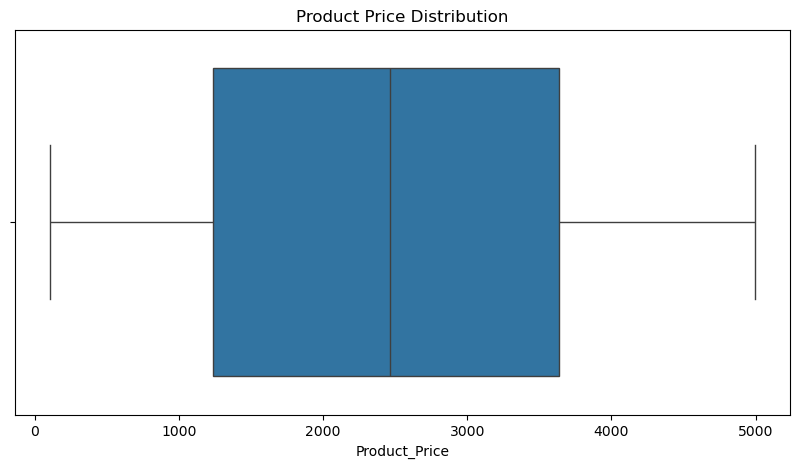

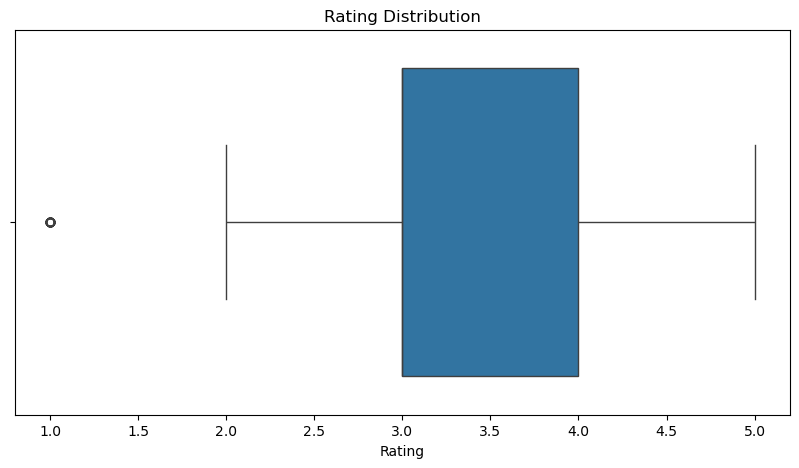

   Order_ID  Product_Category  Product_Price  Customer_Age  Rating  \
0         1                 2         3262.0          58.0     3.0   
1         2                 2          214.0          20.0     3.0   
2         3                 4         3429.0          51.0     2.0   
3         4                 1         4568.0          35.0     3.0   
4         5                 3         2237.0          32.0     4.0   

           Review_Text  Order_Date  
0  Would not recommend  2023-01-01  
1   Excellent product!  2023-01-02  
2      Value for money  2023-01-03  
3      Value for money  2023-01-04  
4      Not as expected  2023-01-05  


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# 1. Load the dataset
df = pd.read_csv('Day 20_E-Commerce_Data.csv')

# 2. Handle missing values
# 2.1 Impute missing 'Customer_Age' (numerical) with Mean
age_imputer = SimpleImputer(strategy='mean')
df['Customer_Age'] = age_imputer.fit_transform(df[['Customer_Age']])

# 2.2 Impute missing 'Rating' (numerical) with Median
rating_imputer = SimpleImputer(strategy='median')
df['Rating'] = rating_imputer.fit_transform(df[['Rating']])

# 2.3 Handle missing 'Review_Text' (textual data)
# For textual data, we can impute missing values with a placeholder string (e.g., "No Review")
df['Review_Text'].fillna('No Review', inplace=True)

# 3. Detect and remove duplicates
# Find and remove duplicated rows based on all columns (or specific ones)
df.drop_duplicates(inplace=True)

# 4. Handle inconsistent data
# 4.1 Standardize 'Rating' values (ensure they are between 1-5)
df['Rating'] = df['Rating'].clip(1, 5)  # Ensure ratings are within the range [1, 5]

# 4.2 Correct spelling inconsistencies in 'Product_Category'
df['Product_Category'] = df['Product_Category'].str.strip().str.lower()  # Lowercase and remove leading/trailing spaces

# 5. Identify and handle outliers
# Use boxplot to identify outliers in 'Product_Price' and 'Rating'
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Product_Price'])
plt.title('Product Price Distribution')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Rating'])
plt.title('Rating Distribution')
plt.show()

# Identify outliers using quantiles (1.5*IQR rule)
Q1_price = df['Product_Price'].quantile(0.25)
Q3_price = df['Product_Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
price_outliers = df[(df['Product_Price'] < (Q1_price - 1.5 * IQR_price)) | (df['Product_Price'] > (Q3_price + 1.5 * IQR_price))]

Q1_rating = df['Rating'].quantile(0.25)
Q3_rating = df['Rating'].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating
rating_outliers = df[(df['Rating'] < (Q1_rating - 1.5 * IQR_rating)) | (df['Rating'] > (Q3_rating + 1.5 * IQR_rating))]

# Remove outliers or apply any transformation (optional)
df = df[(df['Product_Price'] >= (Q1_price - 1.5 * IQR_price)) & (df['Product_Price'] <= (Q3_price + 1.5 * IQR_price))]
df = df[(df['Rating'] >= (Q1_rating - 1.5 * IQR_rating)) & (df['Rating'] <= (Q3_rating + 1.5 * IQR_rating))]

# 6. Prepare cleaned data for analysis
# Convert categorical data into numerical format (e.g., encoding 'Product_Category')
label_encoder = LabelEncoder()
df['Product_Category'] = label_encoder.fit_transform(df['Product_Category'])

# 7. Save the final cleaned dataset as a CSV file
df.to_csv('Cleaned_E_Commerce_Data.csv', index=False)

# Output the first few rows to verify the cleaning process
print(df.head())
